# Introduction

K-nearest neighbor is one of the simplest (and effective in some cases) supervised-learning algorithms in Machine Learning. When training, this algorithm does not learn anything from the training data (this is also the reason why this algorithm is classified as lazy learning), all the computations are done when it needs to predict the outcome of new data. K-nearest neighbor can be applied to both types of Supervised learning problems: Classification and Regression. KNN is also known as an Instance-based or Memory-based learning algorithm.

<table>
  <thead>
    <tr>
      <th>Human Language</th>
      <th>in Machine Learning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Question</td>
      <td>Data point</td>
    </tr>
    <tr>
      <td>Answer</td>
      <td>Output, Label</td>
    </tr>
    <tr>
      <td>Exam review</td>
      <td>Training</td>
    </tr>
    <tr>
      <td>Documents to bring into the exam room</td>
      <td>Training set</td>
    </tr>
    <tr>
      <td>Exam questions</td>
      <td>Test set</td>
    </tr>
    <tr>
      <td>Questions in the exam</td>
      <td>Test data point</td>
    </tr>
    <tr>
      <td>Question with wrong answer</td>
      <td>Noise, Outlier</td>
    </tr>
    <tr>
      <td>Similar question</td>
      <td>Nearest Neighbor</td>
    </tr>
  </tbody>
</table>

With KNN, in a Classification problem, the label of a new data point (or the result of a test question) is inferred directly from the K closest data points in the training set. The label of a test data can be decided by major voting among the closest points, or it can be inferred by assigning different weights to each of those closest points and then inferring the label. Details will be given in the next section.

In the Regression problem, the output of a data point will be equal to either the output of the closest known data point (in case K=1), or a weighted average of the outputs of the closest points, or a relationship based on the distances to those closest points.

In short, KNN is an algorithm that finds the output of a new data point based only on the information of the K data points in the training set closest to it (K-neighbors), regardless of whether some of these closest data points are noise. The figure below is an example of KNN in classification with K = 1.

## k-NN classification

Let's consider a simple classification problem, in which we have two classes and two features. We have two classes, blue and orange, and two features, x and y.

In [43]:
from sklearn.datasets import load_iris, load_wine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

iris = load_iris()
wine = load_wine()

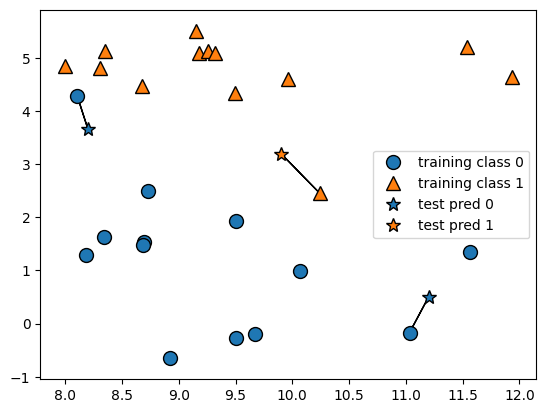

In [15]:
# I'll borrow this function from the book
import mglearn as mgl

mgl.plots.plot_knn_classification(n_neighbors=1)

Ok so, at first, We put in a point near 4, and we want to know if it's blue or orange. Marked the data point with a star. We can find the nearest neighbor to this point, and nearby it's a blue point. So we can predict that the star point is blue. This is the simplest version of the k-NN algorithm. We consider only one neighbor.

We use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. Then we assign the class that is more frequent: in this case, class 1.

Let's increase the number of neighbors to consider to three. Now, we have to look at three nearest neighbors.

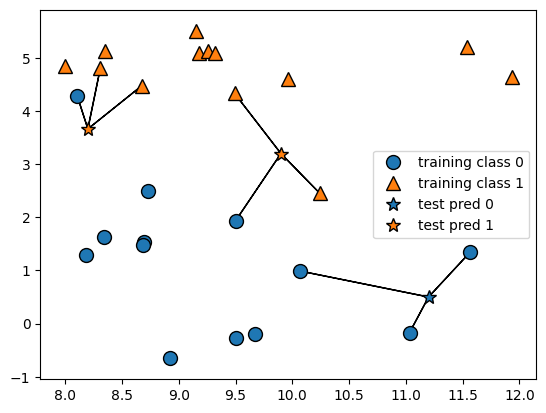

In [17]:
mgl.plots.plot_knn_classification(n_neighbors=3)

As we can see, this time, you can see that the prediction have a small different at the point near 4. This time, we have two neighbors that belong to class 1 and one neighbor that belongs to class 0.

Now let's apply k-NN into our dataset using scikit-learn. First we split our data into a training and a test set so we can evaluate generalization performance.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.neighbors import KNeighborsClassifier

After define our basic function, we can use it to predict the label of the test data. Let's test it out with wine dataset.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify= wine.target, random_state=42)

In [45]:
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)

for n in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    print("n_neighbors = %d, score = %f" % (n, clf.score(X_test, y_test)))
    train_accuracy[n] = clf.score(X_train, y_train)
    test_accuracy[n] = clf.score(X_test, y_test)

n_neighbors = 1, score = 0.733333
n_neighbors = 2, score = 0.711111
n_neighbors = 3, score = 0.711111
n_neighbors = 4, score = 0.688889
n_neighbors = 5, score = 0.777778
n_neighbors = 6, score = 0.733333
n_neighbors = 7, score = 0.755556
n_neighbors = 8, score = 0.800000
n_neighbors = 9, score = 0.777778


To make prediction, we call the predict method of the knn object, and pass it the X_test data. This returns a NumPy array of predictions, one prediction for each data point in the test set.

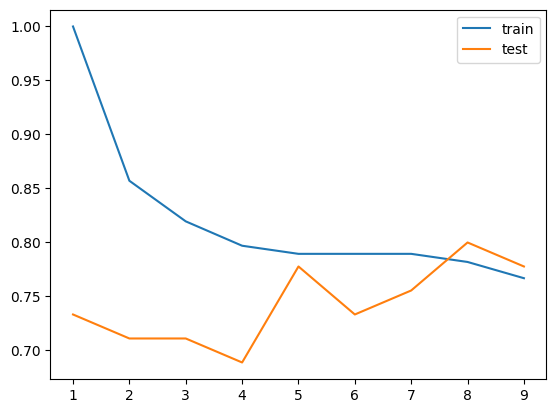

In [46]:
plt.plot(range(1, 10), train_accuracy[1:], label="train")
plt.plot(range(1, 10), test_accuracy[1:], label="test")
plt.legend()
plt.show()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 5 neighbors.

## k-neighbors regression

Beside of classification, k-NN can also be used for regression. Again, let’s start by using the single nearest neighbor, this time using the wave dataset. We’ve added three test data points as green stars on the x-axis:

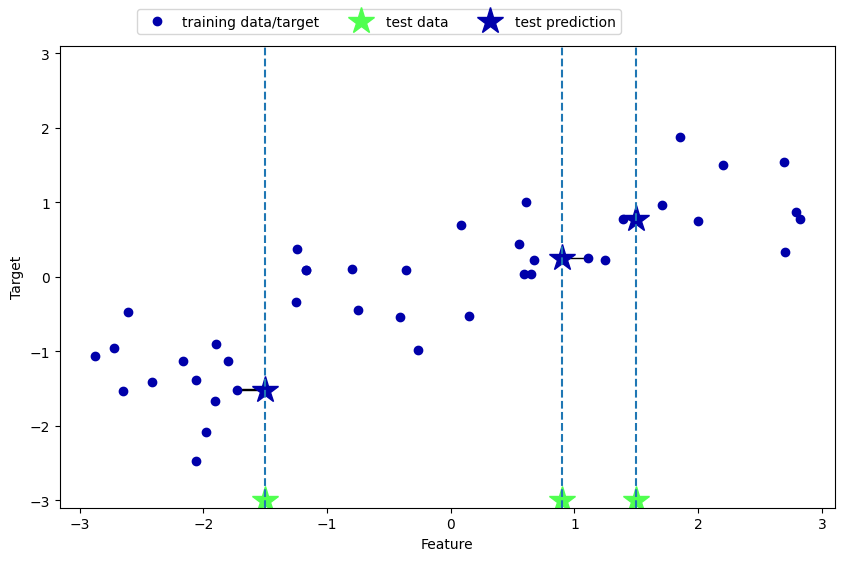

In [51]:
mgl.plots.plot_knn_regression(n_neighbors=1)

Like classification task, we can use more than one nearest neighbor. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors.

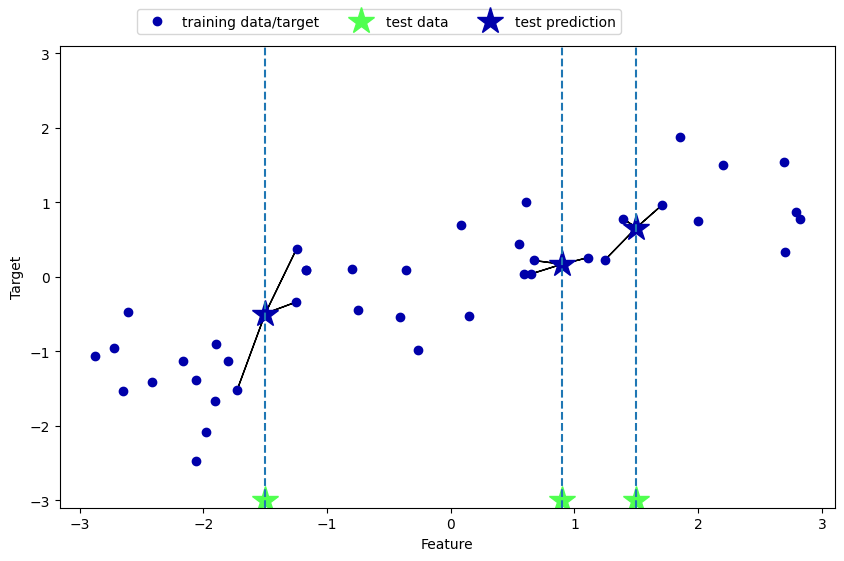

In [52]:
mgl.plots.plot_knn_regression(n_neighbors=3)

Ok,  because of the regression and the classification task are very similar, we can use the same algorithm to do both task. The difference is only the way we use the result of the algorithm. In classification, we use the most frequent class. In regression, we use the mean of the neighbors.

Let's dive into it

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=42)

In [57]:
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)

for n in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    print("n_neighbors = %d, score = %f" % (n, knn.score(X_test, y_test)))
    train_accuracy[n] = knn.score(X_train, y_train)
    test_accuracy[n] = knn.score(X_test, y_test)

n_neighbors = 1, score = 0.919916
n_neighbors = 2, score = 0.939937
n_neighbors = 3, score = 0.942161
n_neighbors = 4, score = 0.949947
n_neighbors = 5, score = 0.951949
n_neighbors = 6, score = 0.944386
n_neighbors = 7, score = 0.950152
n_neighbors = 8, score = 0.948696
n_neighbors = 9, score = 0.950071


Our results this time seem to be good, we can say that the model is good enough to predict the new data point.

Let's visualize it up for better understanding.

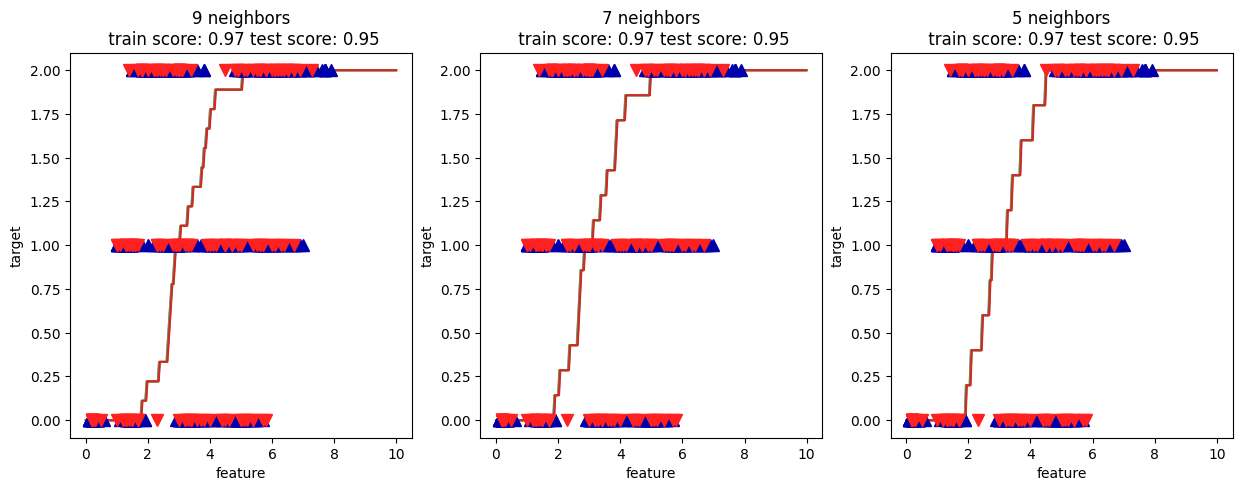

In [77]:
# I will take 3 highest scores
best = np.argsort(test_accuracy)[-3:]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
line = np.linspace(0, 10, 1000).reshape(-1, 4)

for n, ax in zip(best, axes):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    ax.plot(line, knn.predict(line))
    ax.plot(X_train, y_train, '^', c=mgl.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mgl.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbors\n train score: {:.2f} test score: {:.2f}".format(n, knn.score(X_train, y_train),
                                                                       knn.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")

Ok, seem hard to understand, but what you should know is that the line is the prediction of the model. The shaded area represents the uncertainty of the prediction. As you can see in the plot, there are more training points in the areas where the prediction should be made.

## Pros and cons of k-NN

Enough of theoretics, let's talk about the pros and cons of k-NN. In principle, there're two important parameters to the k-NN algorithm: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this tutorial. By default, Euclidean distance is used, which works well in many settings.

k-NN is a very simple algorithm, and it's easy to understand the basic idea. Building the model is fast, but when the training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it's important to preprocess your data. This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

So that's it for k-NN. In the next section, we'll talk about linear models.